## Лабораторна робота 4. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(20,8.27)}) #задамо розмір для всіх подальших вікон

In [50]:
data = pd.read_csv('bank-additional-full.csv', sep =';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [51]:
print('Основна статистична інформація по числовим змінним')
data.describe()

Основна статистична інформація по числовим змінним


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [52]:
print('Розмірність датасету:', data.shape)
print('Типи данних та їх кількість') # немає пропусків
data.info()

Розмірність датасету: (41188, 21)
Типи данних та їх кількість
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [53]:
bank_target = data['y'].replace(['no', 'yes'], [0, 1])
bank_target

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [54]:
bank_client = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]

x = bank_client['age'].sort_values().unique()
print('Age:', x, end= '\n\n')

x = bank_client['job'].sort_values().unique()
print('Job:', x)
c=0
for i in x:
  if not(i in ("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")):
    c = c+1
print('Кількість некоректних даних:', c, end= '\n\n')

x = bank_client['marital'].sort_values().unique()
print('Marital:', x)
c=0
for i in x:
  if not(i in ("divorced","married","single","unknown")):
      c = c+1
print('Кількість некоректних даних:', c, end= '\n\n')

x = bank_client['education'].sort_values().unique()
print('Education:', x)
c=0
for i in x:
  if not(i in ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")):
      c = c+1
print('Кількість некоректних даних:', c, end= '\n\n')

x = bank_client['housing'].sort_values().unique()
print('Housing:', x)
c=0
for i in x:
  if not(i in ("no","yes","unknown")):
      c = c+1
print('Кількість некоректних даних:', c, end= '\n\n')

x = bank_client['loan'].sort_values().unique()
print('Loan:', x)
c=0
for i in x:
  if not(i in ("no","yes","unknown")):
      c = c+1
print('Кількість некоректних даних:', c, end= '\n\n')

x = bank_client['default'].sort_values().unique()
print('Default:', x)
c=0
for i in x:
  if not(i in ("no","yes","unknown")):
      c = c+1
print('Кількість некоректних даних:', c, end= '\n\n')

Age: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 91 92 94 95 98]

Job: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
Кількість некоректних даних: 0

Marital: ['divorced' 'married' 'single' 'unknown']
Кількість некоректних даних: 0

Education: ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
Кількість некоректних даних: 0

Housing: ['no' 'unknown' 'yes']
Кількість некоректних даних: 0

Loan: ['no' 'unknown' 'yes']
Кількість некоректних даних: 0

Default: ['no' 'unknown' 'yes']
Кількість некоректних даних: 0



**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

In [55]:
print('Максимальне значення:', bank_client['age'].max())
print('Мінімальне значення:', bank_client['age'].min())
print('Кількість пропущених значеннь:', bank_client['age'].isna().sum())

Максимальне значення: 98
Мінімальне значення: 17
Кількість пропущених значеннь: 0


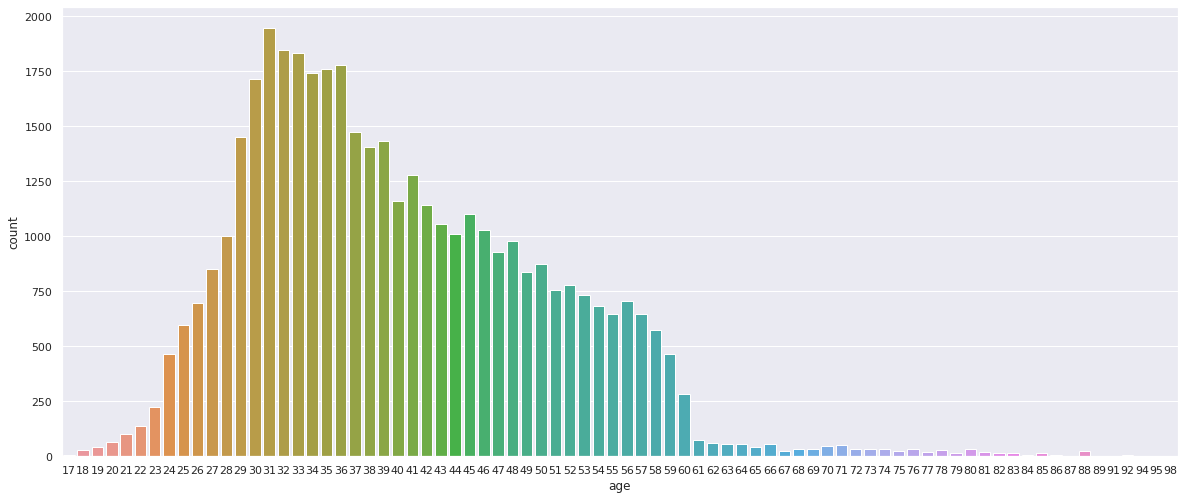

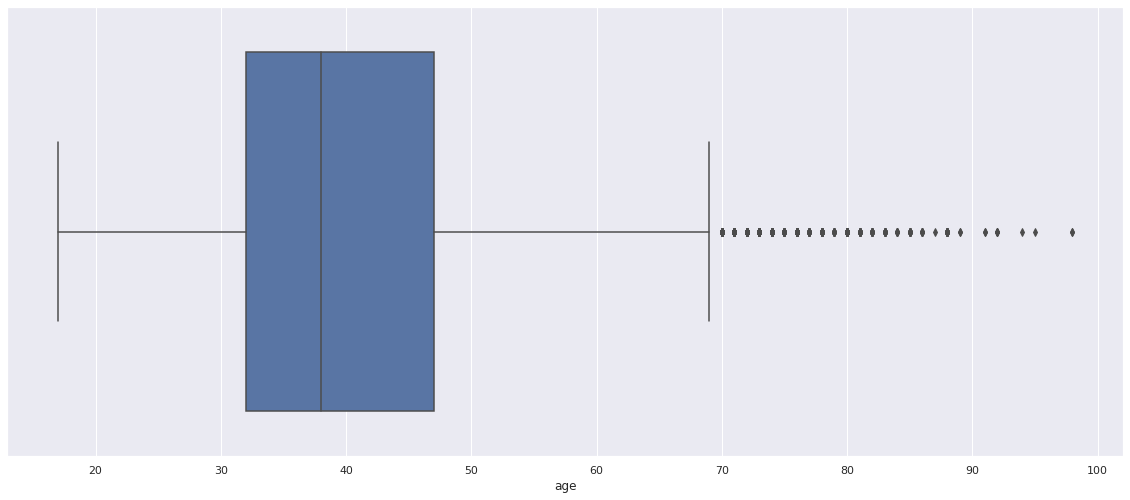

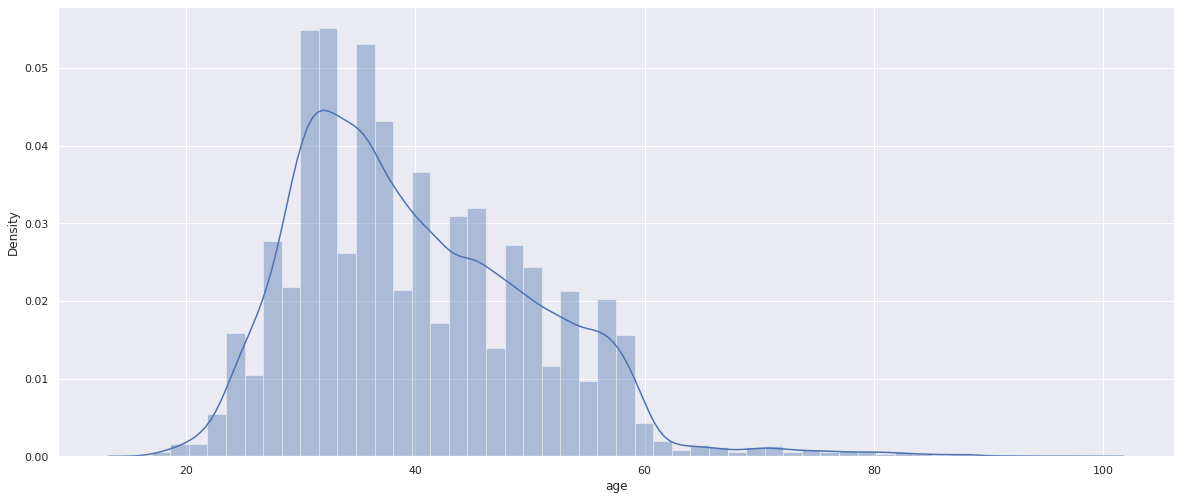

In [56]:
sns.countplot(bank_client['age'])
plt.figure()
sns.boxplot(bank_client['age'])
plt.figure()
sns.distplot(bank_client['age'])


**Висновки з 1-4 завдання (детальні)**

1.   В нашому датасеті 41188 рядків та 21 стовпчик. Надалі всі характеристики будуть більш детально описані. Також немає жодного пропуску.
2.   Наша цільова змінна - кінцева відповідь: надасть банк кредит чи ні, тому ми її переробили в чисельний вид.
3.   Ми зробили окремий датасет з данними про клієнта :'age', 'job', 'marital', 'education', 'default', 'housing', 'loan'. Такі данні як 'job', 'marital', 'education', 'default', 'housing', 'loan' категорільні і тому ми перевірили їх на те, які данні в них зустрічаються та їх релевантність.
4.  Проаналызувавши останню змінну з характеристик людини age, ми побачили, що вона розподілена біномінально в інтервалі від 17 до 98 років. Але маємо правий важкий хвіст.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [57]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile ) # your code )
    Q3 = np.percentile(sorted_data, high_percentile) # your code )
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1 # your code
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 3*(IQR/2)# your code
    up_lim = Q3 + 3*(IQR/2)# your code
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)


    return outliers

In [58]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

Як було сказано вище, ми маємо правий хвіст. Його треба якось почистити. Для цього будемо ввжати, що 80% (від 10 до 90) нашої вибірки - нормальні. Це виходить від 28 до 55 років. Наша вибірка лежить у 3-кратному доверительном інтервалі. Тому усі нестандартні (але допустимі) входять до інтервалу від -12.5 до 95.5. Тому є два викид з 98-річними людьми

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

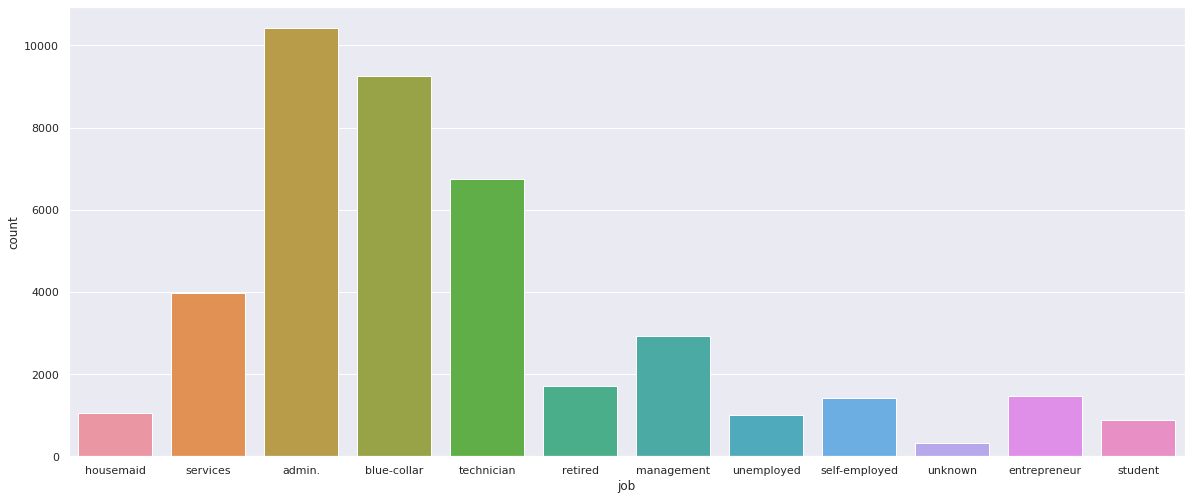

In [59]:
sns.countplot(bank_client['job'])

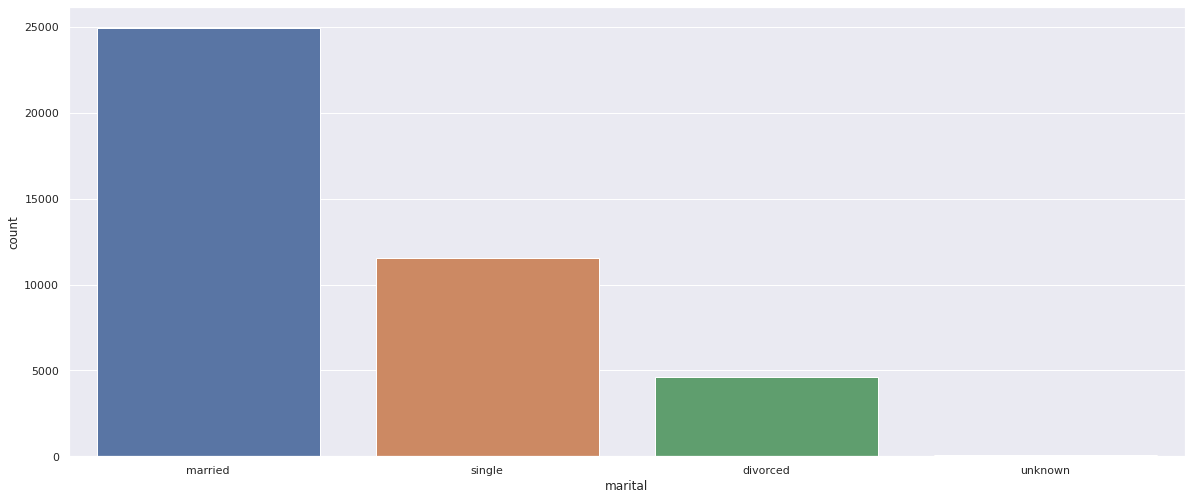

In [60]:
sns.countplot(bank_client['marital'])

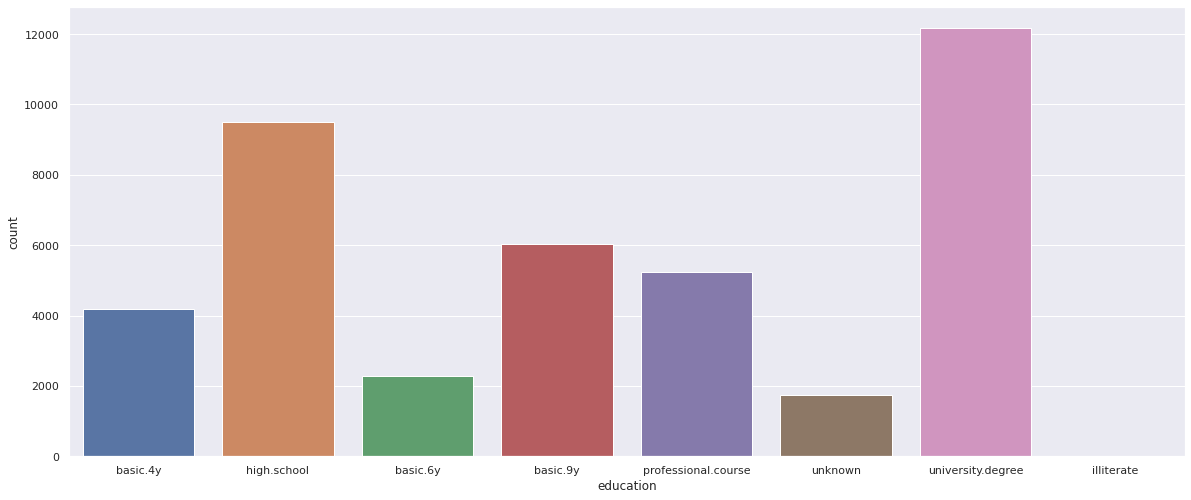

In [61]:
sns.countplot(bank_client['education'])

**Висновки з завдання 6 (детальні)**

Побудовавши каунплоти видно, що люди розподілені дуже нерівномірно між категоріями, не помітен жоден зв'язок, але бачимо, що unknown доволі мало.    
Побудовавши каунтпплот по job, бачимо, що найчастіше звертаються люди, що прцюють admin, blue-collar, techinician. Також більшість - це одружені люди та з вищою чи повною шкільною освітою. 

P.S. Подивившись на кількість адмінів та білих краваток, було нескладно спрогнозувати, що буде високий рівень вищої освіти.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

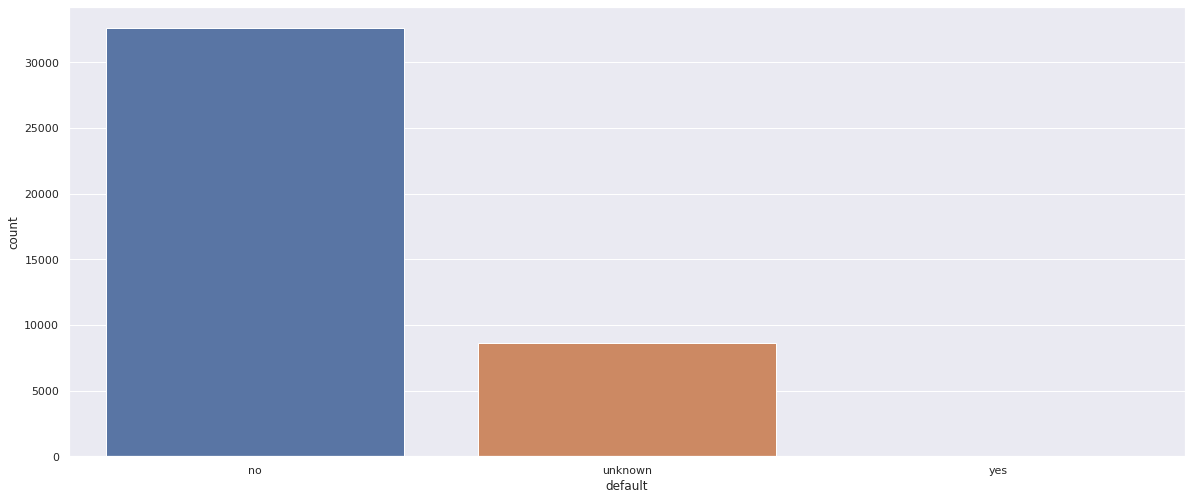

In [62]:
sns.countplot(bank_client['default'])

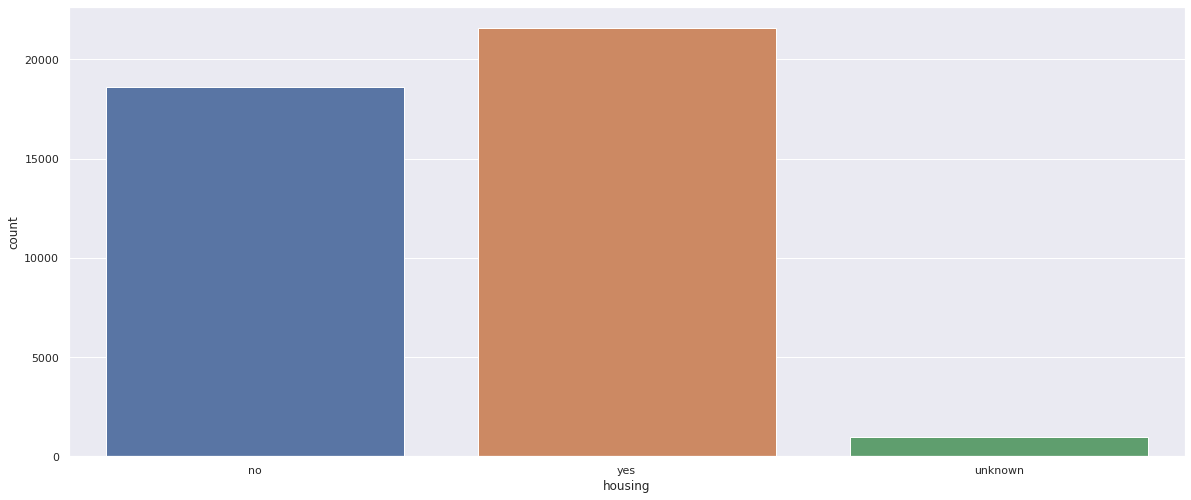

In [63]:
sns.countplot(bank_client['housing'])

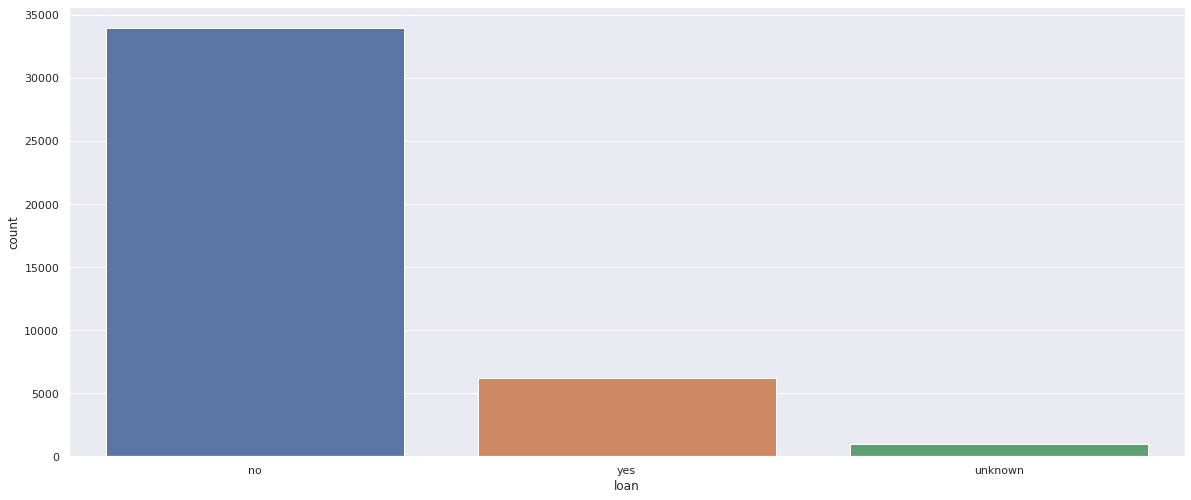

In [64]:
sns.countplot(bank_client['loan'])

Видно, що більшість не має активних кредитів, іпотек чи власних займів.

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [65]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()] #виділяємо наші категорії
        df[col] = le.fit(not_null).transform(not_null) #code
      
    return df

In [66]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])
bank_client

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0
41184,46,1,1,5,0,0,0
41185,56,5,1,6,0,2,0
41186,44,9,1,5,0,0,0


**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [67]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
  """
  Function for encoding age column
    
  df: pd.DataFrame to encode
  age_col: age col to encode 
  """
  #code
  dataframe[age_col] = [0 if x<33 else 1 if x<39 else 2 if x < 48 else 3 for x in dataframe[age_col]]
  return dataframe

In [68]:
bank_client = encode_age(bank_client, 'age')
bank_client

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,1,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,3,5,1,5,0,2,0
41184,2,1,1,5,0,0,0
41185,3,5,1,6,0,2,0
41186,2,9,1,5,0,0,0


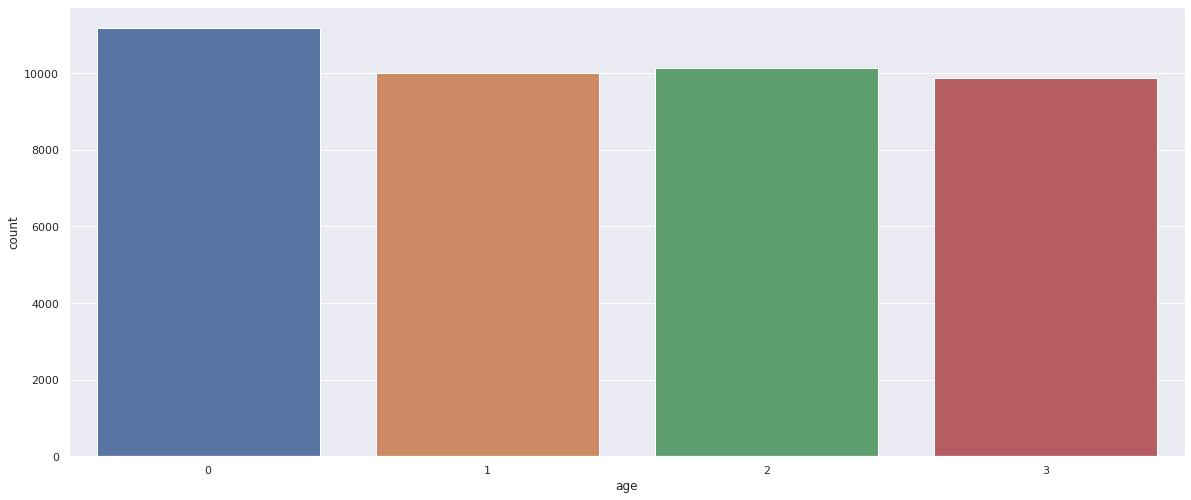

In [69]:
sns.countplot(bank_client['age'])

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

У першому завданні ми дізналися, що 25% віком до 33 років, 50% до 39, 75% до 48. Викоричтовуючи ці знання, задамо 0 усім, кому до 32 олків, 1 - з 33 до 38, 2 - з 39 до 47, 3 - з 48. 
Побудуємо каунтплот і побачимо, що розподіл відбувся рівномірний.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [70]:
bank_relat = data[['contact', 'month', 'day_of_week', 'duration']]
bank_relat.isnull().sum()

contact        0
month          0
day_of_week    0
duration       0
dtype: int64

**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [71]:
x = bank_relat['contact'].sort_values().unique()
print('Contact:', x)
c=0
for i in x:
  if not(i in ('cellular', 'telephone')):
      c = c+1
print('Кількість некоректних даних:', c, end= '\n\n')

x = bank_relat['month'].sort_values().unique()
print('Month:', x)
c=0
for i in x:
  if not(i in ('jan', 'feb', 'mar', 'apr', 'may', 'jul', 'jun', 'aug', 'sep', 'oct', 'nov', 'dec')):
    c = c+1
print('Кількість некоректних даних:', c, end= '\n\n')

x = bank_relat['day_of_week'].sort_values().unique()
print('Day_of_week:', x)
c=0
for i in x:
  if not(i in ('mon', 'tue', 'wed', 'thu', 'fri')):
      c = c+1
print('Кількість некоректних даних:', c, end= '\n\n')

Contact: ['cellular' 'telephone']
Кількість некоректних даних: 0

Month: ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
Кількість некоректних даних: 0

Day_of_week: ['fri' 'mon' 'thu' 'tue' 'wed']
Кількість некоректних даних: 0



# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



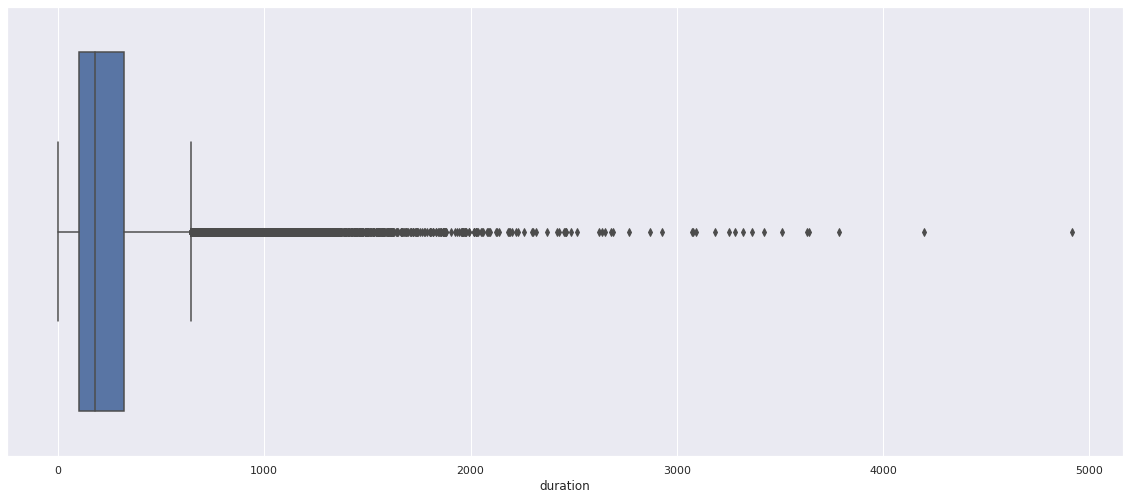

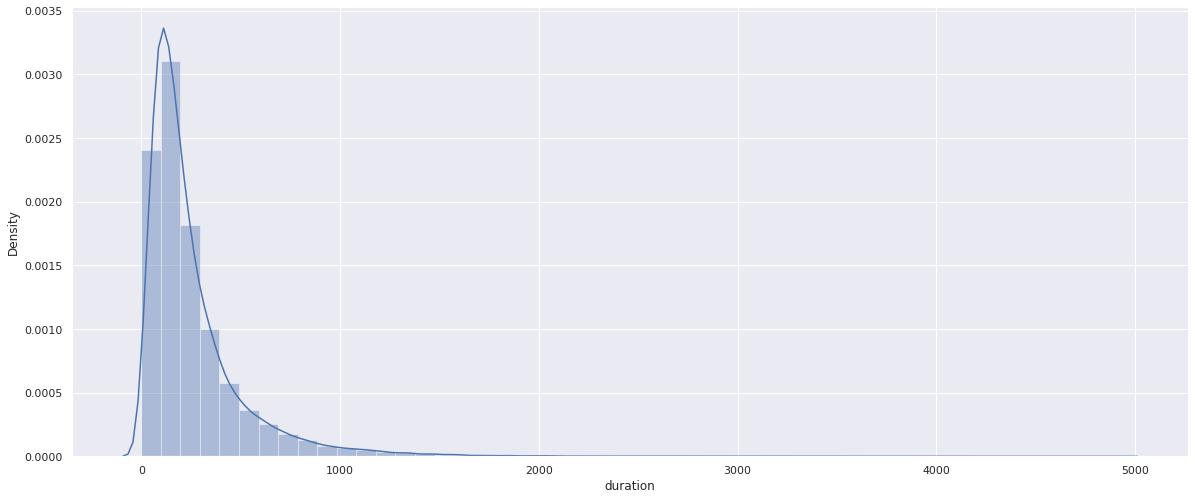

In [72]:
plt.figure()
sns.boxplot(data['duration'])
plt.figure()
sns.distplot(data['duration'])

Маєво важкий правий хвіст та багато викидів зправа

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [73]:
bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])
bank_relat

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307
...,...,...,...,...
41183,0,7,0,334
41184,0,7,0,383
41185,0,7,0,189
41186,0,7,0,442


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [74]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
  """
  Function for encoding duration column
    
  df: pd.DataFrame to encode
  duration_col: duration col to encode 
  """
  
  #code
  dataframe[duration_col] = [0 if x<=102 else 1 if x<=180 else 2 if x <=319 else 3 for x in dataframe[duration_col]]
          
  return dataframe

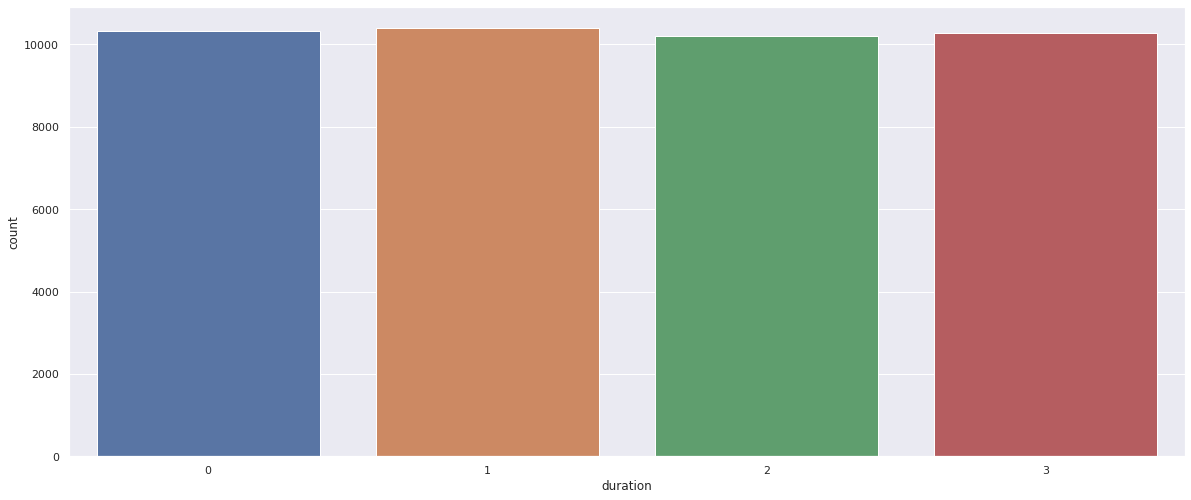

In [75]:
bank_relat = encode_duration(bank_relat, 'duration')
sns.countplot(bank_relat['duration'])

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [76]:
bank_socec = data[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_socec

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...
41183,-1.1,94.767,-50.8,1.028,4963.6
41184,-1.1,94.767,-50.8,1.028,4963.6
41185,-1.1,94.767,-50.8,1.028,4963.6
41186,-1.1,94.767,-50.8,1.028,4963.6


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [77]:
bank_other = data[['campaign', 'pdays', 'previous', 'poutcome']]
bank_other

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent
...,...,...,...,...
41183,1,999,0,nonexistent
41184,1,999,0,nonexistent
41185,2,999,0,nonexistent
41186,1,999,0,nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [78]:
bank_other['poutcome'] = encode_categorical_columns(bank_other, ["poutcome"])
bank_other

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1
...,...,...,...,...
41183,1,999,0,1
41184,1,999,0,1
41185,2,999,0,2
41186,1,999,0,1


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [79]:
bank_final = pd.concat([bank_client, bank_relat, bank_other, bank_socec], axis=1) # використаємо усі, окрім таргету
bank_final

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,3,1,0,0,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,3,7,1,3,1,0,0,1,6,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,1,7,1,3,0,2,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,2,0,1,1,0,0,0,1,6,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,3,7,1,3,0,0,2,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3,5,1,5,0,2,0,0,7,0,3,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,2,1,1,5,0,0,0,0,7,0,3,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,3,5,1,6,0,2,0,0,7,0,2,2,999,0,2,-1.1,94.767,-50.8,1.028,4963.6
41186,2,9,1,5,0,0,0,0,7,0,3,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


**Завдання 19** Провести ділення вибірки

In [80]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    # одразу розділили на фічі та результат 
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    y = target
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)

    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [81]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, bank_target, 0.2, 10, 101)

In [82]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [83]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [84]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7136  167]
 [ 620  315]]
90.0


## k-NN

k=1 86.87 (+/- 0.30)
k=2 89.35 (+/- 0.38)
k=3 88.77 (+/- 0.33)
k=4 89.73 (+/- 0.43)
k=5 89.49 (+/- 0.36)
k=6 90.08 (+/- 0.42)
k=7 90.14 (+/- 0.36)
k=8 90.27 (+/- 0.40)
k=9 90.39 (+/- 0.36)
k=10 90.43 (+/- 0.43)
k=11 90.42 (+/- 0.43)
k=12 90.47 (+/- 0.49)
k=13 90.47 (+/- 0.50)
k=14 90.48 (+/- 0.47)
k=15 90.47 (+/- 0.41)
k=16 90.51 (+/- 0.46)
k=17 90.51 (+/- 0.41)
k=18 90.52 (+/- 0.40)
k=19 90.53 (+/- 0.40)
k=20 90.47 (+/- 0.37)
k=21 90.47 (+/- 0.41)
k=22 90.49 (+/- 0.39)
k=23 90.58 (+/- 0.40)
k=24 90.56 (+/- 0.39)
k=25 90.61 (+/- 0.38)
The optimal number of neighbors is 24 with 90.6%


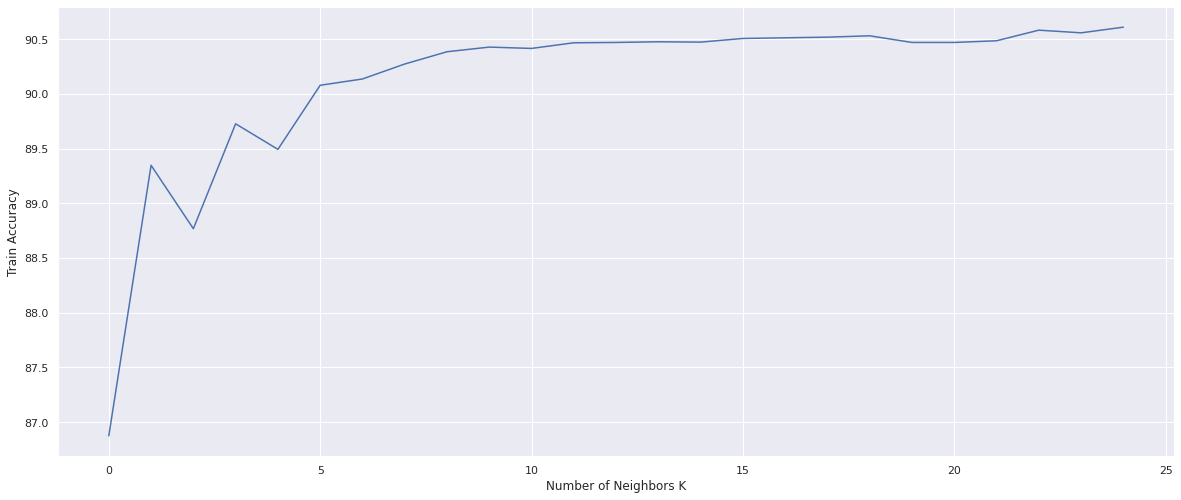

In [85]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [86]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7155  148]
 [ 681  254]]
90.0


## Логістична Регресія

In [88]:
models = pd.DataFrame({
                'Models': ['Логістична Регресія', 'k-найближчих сусідів'],#code,
                'Score':  [LOGCV, KNNCV]})#code]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Логістична Регресія,0.903739
1,k-найближчих сусідів,0.899488


**Висновки по моделям (детальні)**

Після всіх аналізів, перетворечень з неперервних данних у категоріальні та аналізу різних категорій, роздіення на фічі та результати, ми можемо почати навчання наших моделей. 

Було змоделювані два типа навчання: логістична регресія та метод k-найближчих сусідів.

Логістична регресія добре пряцює з бінарними відподями (як в нашому випадку) і тому вона надала точність 90.4%. 

Метод найближчих сусідів дуже довго навчався та надав оптимальне рішення в 24 сусіда. Результа на тестовій частині в 89.9%. Але цей метод доволі універсальний і енергоємкий для простої класифікації на так/ні. 

Логістична регресія показала на 0.5% кращий результат, ніж найближчих сусідів, тому що це бінарно-направлений метод, а k-найближчих більш універсальний.